In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn import cluster, mixture, datasets
from sklearn.preprocessing import StandardScaler

### Creating the blobs dataset

In [2]:
X_blob, Y_blob = datasets.make_blobs(n_samples=500, 
                             n_features=2, 
                             centers=4,
                             cluster_std=[2,2,2,2], 
                             random_state=42)

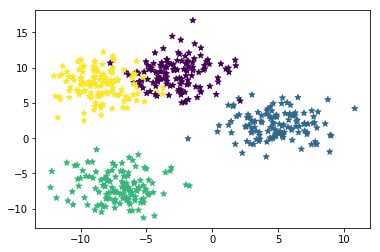

In [3]:
plt.scatter(X_blob[:, 0], X_blob[:, 1], marker='*', c=Y_blob)
plt.show()

In [4]:
X_blob = StandardScaler().fit_transform(X_blob)

### Creating the moons dataset

In [5]:
X_moon, Y_moon = datasets.make_moons(n_samples=1500, noise=.05)

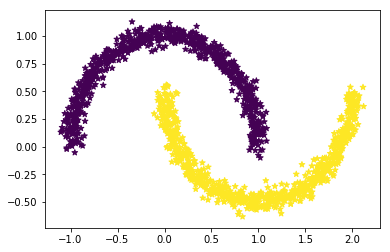

In [6]:
plt.scatter(X_moon[:, 0], X_moon[:, 1], marker='*', c=Y_moon)
plt.show()

In [7]:
X_moon = StandardScaler().fit_transform(X_moon)

## Trying out our clustering techniques

### k - means clustering

#### Blob data

In [8]:
%%time
labels = cluster.KMeans(n_clusters=4).fit_predict(X_blob)

Wall time: 67.1 ms


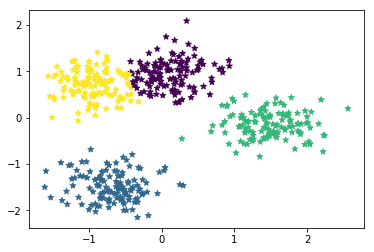

In [9]:
plt.scatter(X_blob[:, 0], X_blob[:, 1], marker='*', c=labels)
plt.show()

#### Moon data

In [10]:
%%time
labels = cluster.KMeans(n_clusters=2).fit_predict(X_moon)

Wall time: 41 ms


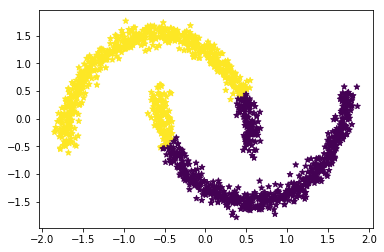

In [11]:
plt.scatter(X_moon[:, 0], X_moon[:, 1], marker='*', c=labels)
plt.show()

### Applying Hierarchal (agglomerative) clustering

In [12]:
?cluster.AgglomerativeClustering

#### Blob data

In [13]:
%%time
labels = cluster.AgglomerativeClustering(n_clusters=4, linkage="ward").fit_predict(X_blob)

Wall time: 42.2 ms


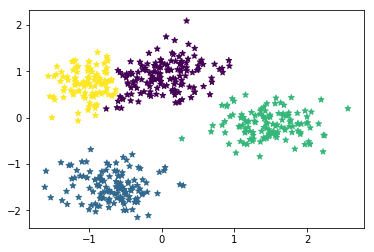

In [14]:
plt.scatter(X_blob[:, 0], X_blob[:, 1], marker='*', c=labels)
plt.show()

#### Moon data

In [15]:
%%time
labels = cluster.AgglomerativeClustering(n_clusters=2, linkage="ward").fit_predict(X_moon)

Wall time: 123 ms


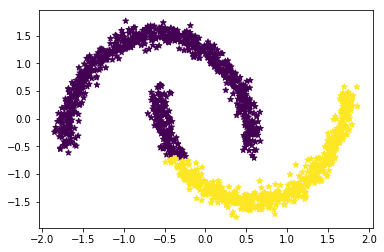

In [16]:
plt.scatter(X_moon[:, 0], X_moon[:, 1], marker='*', c=labels)
plt.show()

### Applying DBScan clustering

In [17]:
?cluster.DBSCAN

#### Blob data

In [18]:
%%time
labels = cluster.DBSCAN(eps=0.25, min_samples=5).fit_predict(X_blob)

Wall time: 7.01 ms


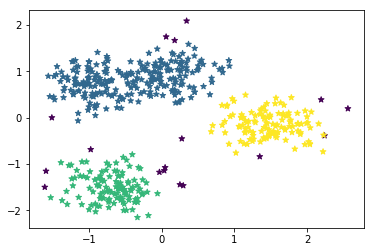

In [19]:
plt.scatter(X_blob[:, 0], X_blob[:, 1], marker='*', c=labels)
plt.show()

#### Moon data

In [20]:
%%time
labels = cluster.DBSCAN(eps=0.2).fit_predict(X_moon)

Wall time: 32 ms


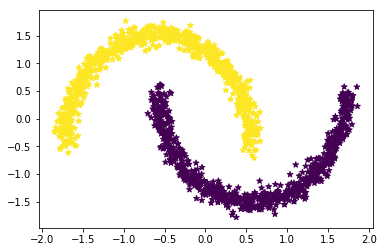

In [21]:
plt.scatter(X_moon[:, 0], X_moon[:, 1], marker='*', c=labels)
plt.show()

### Applying Hierarchal (agglomerative) clustering - single linkage

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [23]:
?linkage

In [24]:
?fcluster

#### Moon data

In [25]:
%%time
Z = linkage(X_moon, 'single')
clusters = fcluster(Z, 2, criterion='maxclust')

Wall time: 63 ms


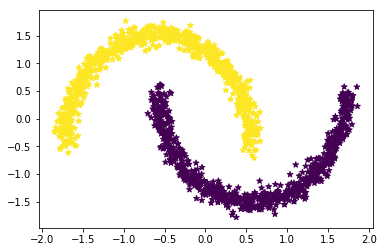

In [26]:
plt.scatter(X_moon[:, 0], X_moon[:, 1], marker='*', c=clusters)
plt.show()

### Applying Spectral clustering

In [27]:
?cluster.SpectralClustering

#### Blob data

In [28]:
%%time
labels = cluster.SpectralClustering(n_clusters=4, affinity="nearest_neighbors").fit_predict(X_blob)

Wall time: 98.1 ms


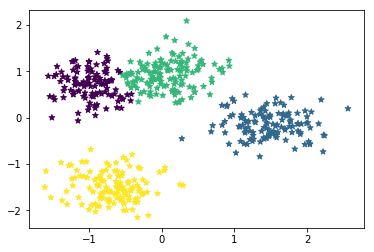

In [29]:
plt.scatter(X_blob[:, 0], X_blob[:, 1], marker='*', c=labels)
plt.show()

#### Moon data

In [30]:
%%time
labels = cluster.SpectralClustering(n_clusters=2, affinity="nearest_neighbors").fit_predict(X_moon)

C:\Users\rahim.baig\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Wall time: 2.17 s


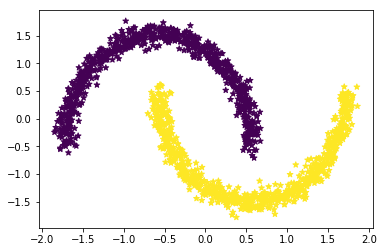

In [31]:
plt.scatter(X_moon[:, 0], X_moon[:, 1], marker='*', c=labels)
plt.show()